## Advanced Client Segmentation

MIT tarafından geliştirilmiş ileri seviye kütüphane kullananacağız.
Çünkü veriler kompleks bir yapıda

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
# datasetinde null data var mı kontrolü

df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
# Age ve Income Normalization

df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [7]:
# Scaling işlemi Age ve Income için (nümerik veri oldukları için)

scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [8]:
# ID drop işlemi

df.drop(['ID'], axis=1)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.500000,1,0.320595,0,0
1996,1,1,0.155172,1,0.299460,1,0
1997,0,0,0.224138,0,0.184871,0,0
1998,1,1,0.103448,1,0.227162,0,0


In [9]:
# int değerleri float'a çevirme

mark_array = df.values
mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)

In [10]:
# Build model

kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0,1,3,5,6]) # kategorik olan verileri belirtiyoruz.

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 239, ncost: 2717.606839581375
Run: 1, iteration: 2/20, moves: 37, ncost: 2714.5328681066503
Run: 1, iteration: 3/20, moves: 0, ncost: 2714.5328681066503
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 197, ncost: 2679.9118721976965
Run: 2, iteration: 2/20, moves: 23, ncost: 2677.3387654824646
Run: 2, iteration: 3/20, moves: 0, ncost: 2677.3387654824646
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, mov

10

In [11]:
cluster_dict = []

for c in clusters:
    cluster_dict.append(c)

df['cluster'] = cluster_dict

df[['ID', 'Age', 'Income']] = df_temp

In [12]:
df[df['cluster']==0].head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
2,100000003,0,0,49,1,89210,0,0,0
5,100000006,0,0,35,1,144848,0,0,0
16,100000017,0,0,53,1,125550,1,0,0
22,100000023,0,0,48,1,89804,0,0,0
25,100000026,0,0,36,1,71909,0,0,0
42,100000043,0,0,44,1,133658,0,0,0
46,100000047,0,0,39,1,140182,1,0,0
48,100000049,0,0,39,1,130500,0,0,0
71,100000072,0,0,46,1,73703,0,0,0
78,100000079,0,0,39,1,151697,0,0,0


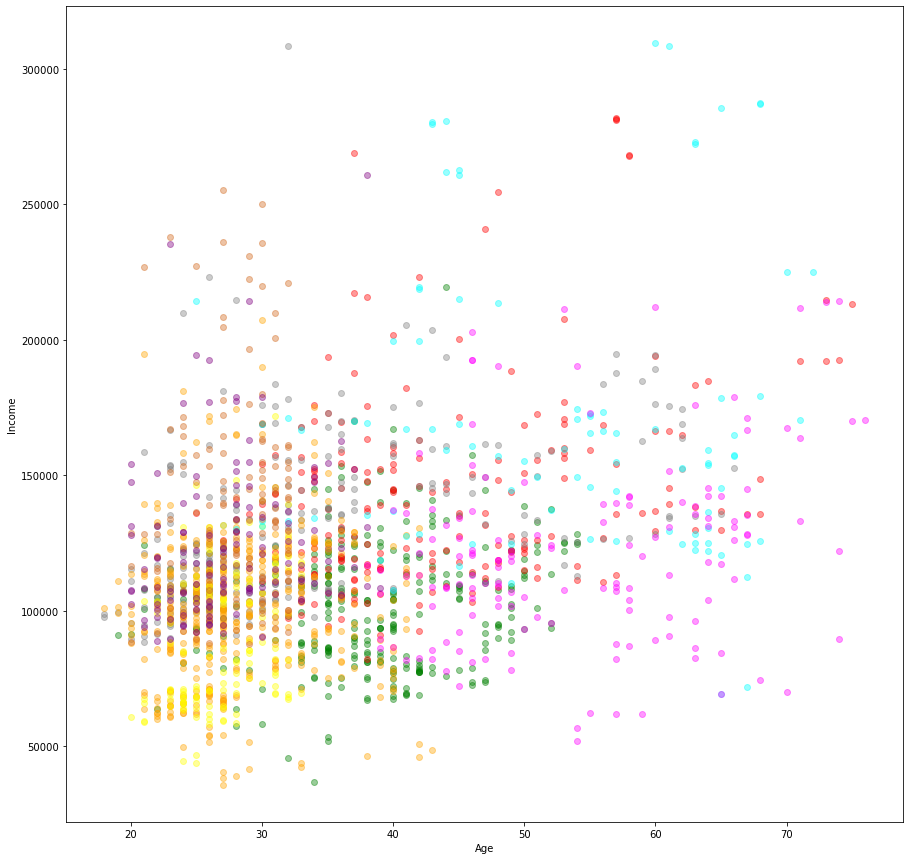

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'], color='green', alpha=0.4)
plt.scatter(df2.Age, df2['Income'], color='red', alpha=0.4)
plt.scatter(df3.Age, df3['Income'], color='gray', alpha=0.4)
plt.scatter(df4.Age, df4['Income'], color='orange', alpha=0.4)
plt.scatter(df5.Age, df5['Income'], color='yellow', alpha=0.4)
plt.scatter(df6.Age, df6['Income'], color='cyan', alpha=0.4)
plt.scatter(df7.Age, df7['Income'], color='magenta', alpha=0.4)
plt.scatter(df8.Age, df8['Income'], color='chocolate', alpha=0.4)
plt.scatter(df9.Age, df9['Income'], color='purple', alpha=0.4)
plt.scatter(df10.Age, df10['Income'], color='blue', alpha=0.4)